# Projet1:Prédiction  de la dessertion des clients

# ********************* Membres du groupe************************

# Marc Aurèle ALE
# Tèkiyath AMOUSSA 
# Rimbé G. S. KAFANDO
# Sophie Basse SENE

## 1-Decider du probleme de machine learning sur la base de l’ensemble de donnees(Regression ou Classification ).

Notre projet a pour but de prédire la désertion des clients. Dans ce cas, le but est de prédire si un client va se désabonner (churn) ou non. La variable cible appropriée dans ce dataset serait donc churn . Cette variable cible est utilisée pour formuler un problème de classification binaire, où l'objectif est de prédire une des deux classes possibles ("Yes" pour les clients qui se désabonnent et "No" pour ceux qui restent).

## 2-Choisir et decrire un algorithme de machine learning traditionnel approprié pour ce problème.
Nous choisissons la régression logistique car elle est adaptée aux problèmes de classification binaire. De plus elle est souvent utilisée pour les projets de prédiction de désabonnement (churn) des clients comme prédire si un client va se désabonner ou non. Elle est interprétable, permettant de comprendre l'impact de chaque caractéristique sur la probabilité de churn. Simple à mettre en œuvre, elle est aussi efficace et moins coûteuse en calcul que des modèles plus complexes. La régression logistique offre une performance solide, surtout avec une bonne ingénierie des caractéristiques et des techniques de régularisation. De plus, elle est bien supportée par des bibliothèques comme scikit-learn, facilitant son implémentation.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Charger le dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


# 3.1 Analyse exploratoire des données

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


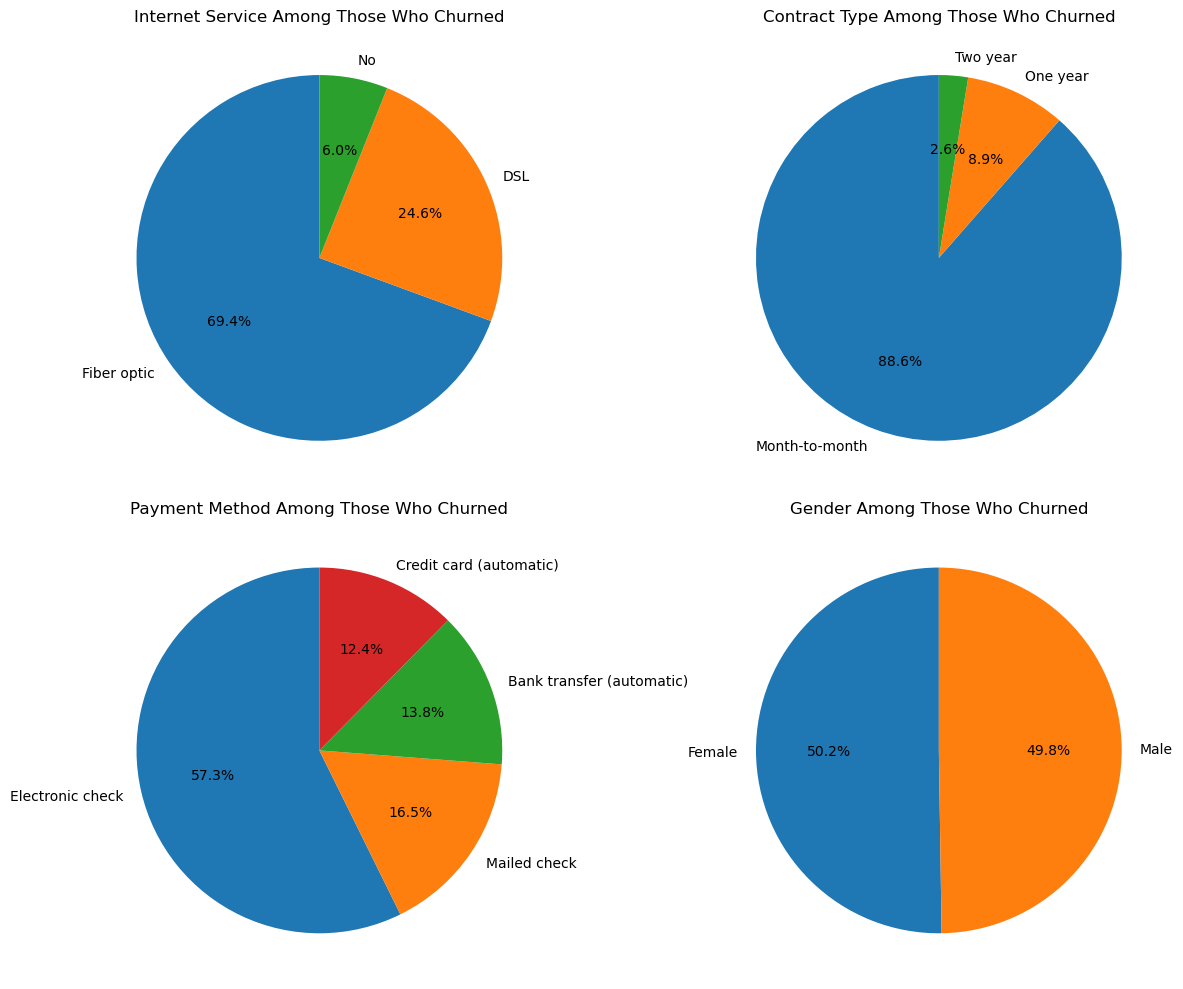

In [4]:
import matplotlib.pyplot as plt



# Calculer le nombre total de clients ayant résilié leur abonnement
total_churned = len(df[df['Churn'] == 'Yes'])

# Calculer les pourcentages des différentes catégories parmi ceux qui ont résilié
percentage_churned_internet = (df[df['Churn'] == 'Yes']['InternetService'].value_counts() / total_churned) * 100
percentage_churned_contract = (df[df['Churn'] == 'Yes']['Contract'].value_counts() / total_churned) * 100
percentage_churned_payment = (df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts() / total_churned) * 100
percentage_churned_gender = (df[df['Churn'] == 'Yes']['gender'].value_counts() / total_churned) * 100

# Créer les visualisations
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Graphique pour Internet Service
axs[0, 0].pie(percentage_churned_internet, labels=percentage_churned_internet.index, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Internet Service Among Those Who Churned')

# Graphique pour Contract Type
axs[0, 1].pie(percentage_churned_contract, labels=percentage_churned_contract.index, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Contract Type Among Those Who Churned')

# Graphique pour Payment Method
axs[1, 0].pie(percentage_churned_payment, labels=percentage_churned_payment.index, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Payment Method Among Those Who Churned')

# Graphique pour Gender
axs[1, 1].pie(percentage_churned_gender, labels=percentage_churned_gender.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Gender Among Those Who Churned')

plt.tight_layout()
plt.show()


Nous pouvons constater que les clients avec un service Internet par fibre optique, un contrat au mois, et utilisant le prélèvement automatique comme méthode de paiement sont plus susceptibles de résilier leur abonnement. 

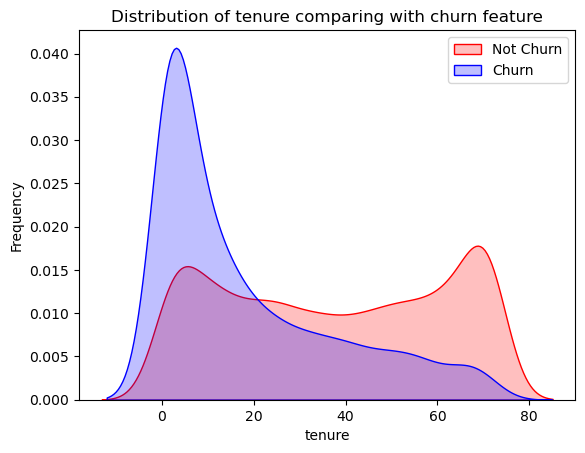

In [5]:
import seaborn as sns
g = sns.kdeplot(df.tenure[(df["Churn"] == "No")], color="Red", fill=True)
g = sns.kdeplot(df.tenure[(df["Churn"] == "Yes")], ax=g, color="Blue", fill=True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

Nous pouvons constater que plus la durée d'abonnement des clients est élevée, moins ils sont susceptibles de résilier leur abonnement, tandis que les clients ayant une durée d'abonnement plus courte sont plus susceptibles de le faire. 

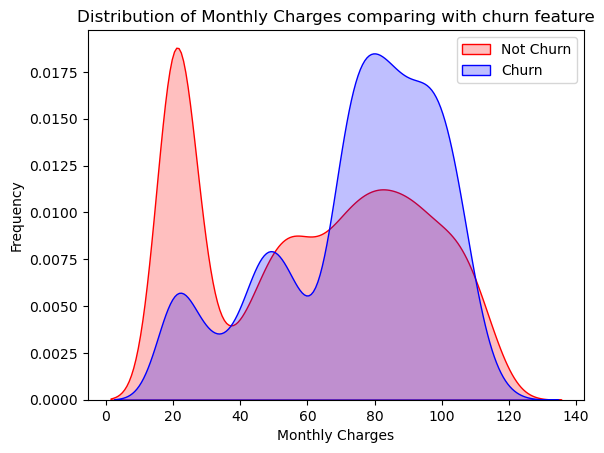

In [6]:
g1 = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "No")], color="Red", fill=True)
g1 = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "Yes")], color="Blue", fill=True)
g1.set_xlabel("Monthly Charges")
g1.set_ylabel("Frequency")
g1.set_title('Distribution of Monthly Charges comparing with churn feature')
g1.legend(["Not Churn","Churn"])

plt.show()

Les clients ayant des charges mensuelles plus élevées sont plus susceptibles de résilier leur abonnement, tandis que ceux ayant des charges mensuelles plus faibles sont moins susceptibles de le faire. 

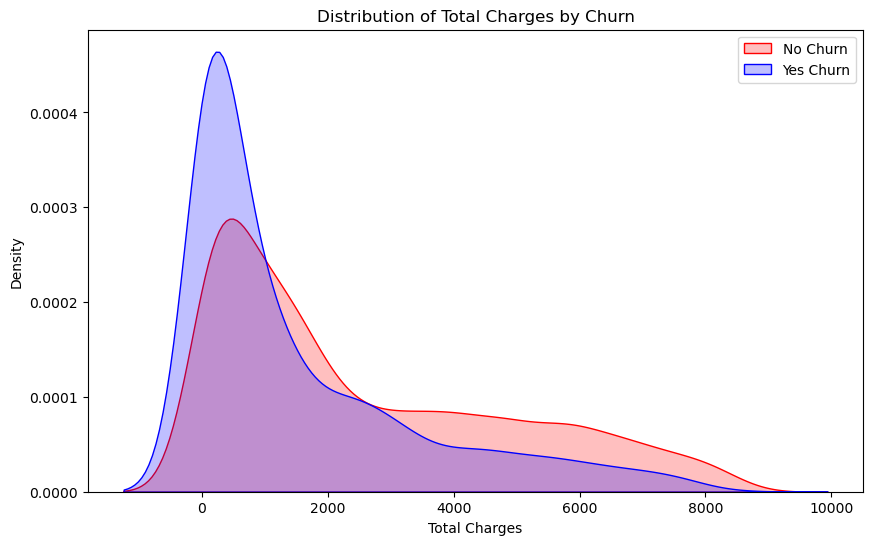

In [7]:
# Convertir la colonne TotalCharges en numérique, en remplaçant les valeurs non numériques par NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes dans TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Tracer le graphique KDE après conversion
plt.figure(figsize=(10, 6))
g2 = sns.kdeplot(df.TotalCharges[(df["Churn"] == "No")], color="Red", fill=True)
g2 = sns.kdeplot(df.TotalCharges[(df["Churn"] == "Yes")], color="Blue", fill=True)
g2.set_xlabel("Total Charges")
g2.set_title("Distribution of Total Charges by Churn")
plt.legend(labels=["No Churn", "Yes Churn"])
plt.show()


Les clients avec des charges totales relativement plus élevées sont plus susceptibles de résilier leur abonnement.

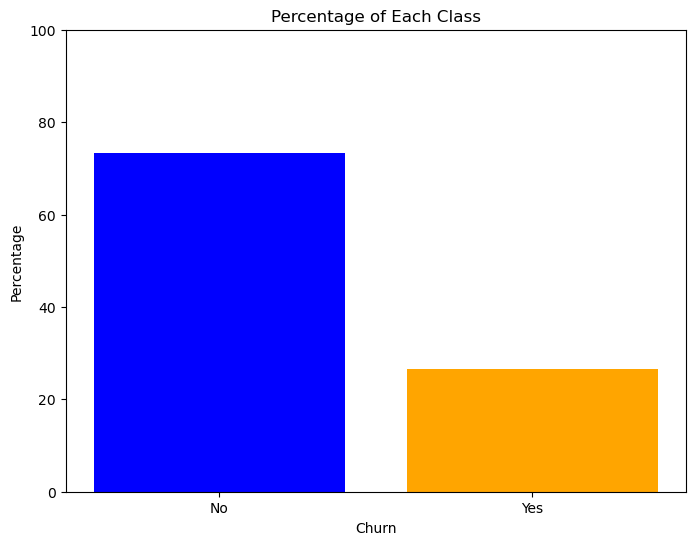

In [8]:
# Calculer le pourcentage de chaque classe
class_percentages = df['Churn'].value_counts(normalize=True) * 100

# Créer un diagramme à barres pour visualiser les pourcentages de chaque classe
plt.figure(figsize=(8, 6))
plt.bar(class_percentages.index, class_percentages.values, color=['blue', 'orange'])
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Percentage of Each Class')
plt.xticks(class_percentages.index, ['No', 'Yes'])
plt.ylim(0, 100)
plt.show()


Nous remarquons que les données sont très déséquilibrées.Il nous faut donc les rééquilibrer.

# 3.2 Prétraitement des données

Gestion des valeurs maquantes

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Nous remarquons qu'il n'existe pas de valeurs maquantes dans ce dataset.

# Encodage des variables categorielle

In [10]:
# Prétraitement des données
# Supprimer les colonnes inutiles et les valeurs manquantes
df.drop(['customerID'], axis=1, inplace=True)
df.dropna(inplace=True)

# Convertir les variables catégorielles en numériques
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [11]:
df.groupby('Churn').mean()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,
0,0.507263,0.128995,0.527600,0.343405,37.650010,0.901220,0.918846,0.893473,0.938795,1.009297,0.998063,0.942669,1.004261,1.013558,0.887081,0.536122,1.503971,61.307408,2555.344141
1,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,1.000535,0.814874,0.376137,0.620118,0.643660,0.392188,0.931514,0.935795,0.140182,0.749064,1.764580,74.441332,1531.796094


La moyenne de la variable tenure nous montre que les clients qui sont désabonnes(17.97) ont une durée d'abonnement plus courte que ceux qui y restent(37.65)
Les clients qui se sont désabonnés ont généralement payé un total moins élevé au cours de leur abonnement, ce qui est cohérent avec une durée d'abonnement plus courte.

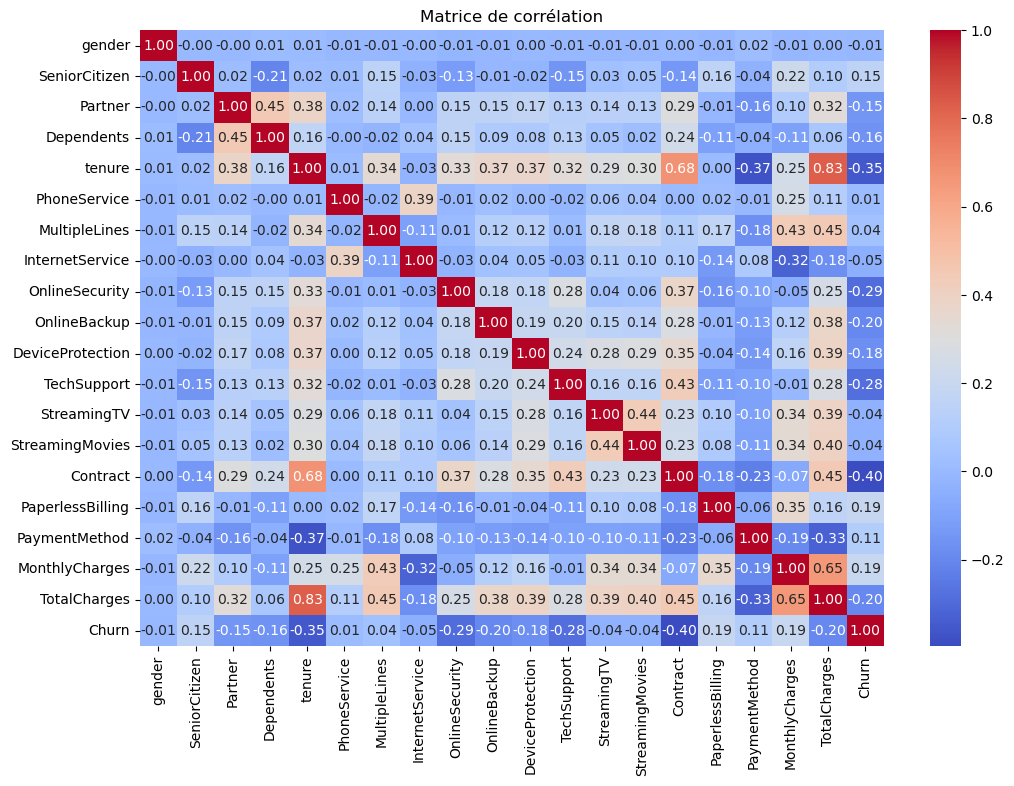

In [12]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Créer un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


On remarque que les variables tenure et TotalCharges sont fortement corrélés.De même que Contract et tenure,
Les variables MonthlyCharges et TotalCharge sont également corrélés.Ce qui signifie que l'on peut supprimer l'une ou deux  des quatres variables car ils ont les mêmes impacts sur la variable cible

# Rééquilibrage des données

In [13]:
# Calcul du nombre d'observations pour chaque classe
count_no_churn = len(df[df['Churn']==0])
count_churn = len(df[df['Churn']==1])
count_no_churn,count_churn

(5163, 1869)

In [14]:

# Supposons que count_churn contient les données de la classe minoritaire que vous souhaitez suréchantillonner

# Suréchantillonnage de la classe minoritaire
upsampled_minority = df[df['Churn']==1].sample(n=count_no_churn, replace=True, random_state=42)

# Concaténez les classes majoritaire et minoritaire suréchantillonnées
balanced_df = pd.concat([df[df['Churn']==0], upsampled_minority])

# Après la concaténation des classes majoritaire et minoritaire suréchantillonnées dans balanced_df

# Accès aux exemples de la classe majoritaire dans balanced_df
majority_class_balanced = len(balanced_df[balanced_df['Churn'] == 0])

# Accès aux exemples de la classe minoritaire dans balanced_df
minority_class_balanced = len(balanced_df[balanced_df['Churn'] == 1])

majority_class_balanced, minority_class_balanced



(5163, 5163)

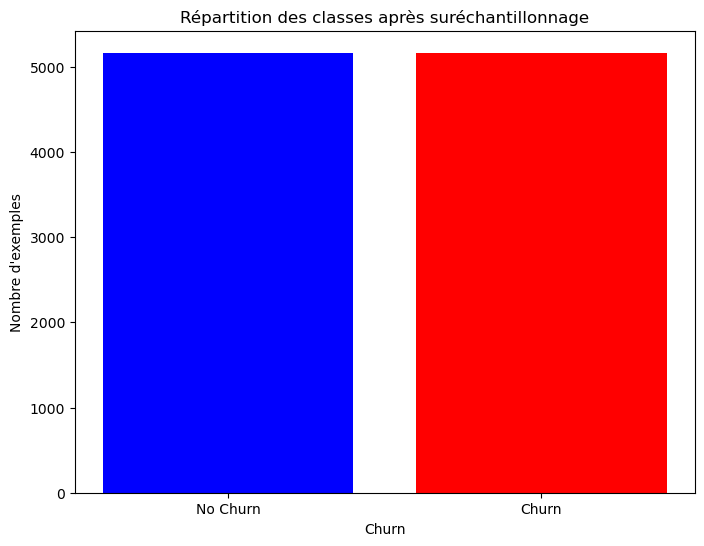

In [15]:
import matplotlib.pyplot as plt

# Calculer le nombre d'exemples pour chaque classe
class_counts = balanced_df['Churn'].value_counts()

# Tracez un diagramme à barres
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks(class_counts.index, ['No Churn', 'Churn'])
plt.xlabel('Churn')
plt.ylabel('Nombre d\'exemples')
plt.title('Répartition des classes après suréchantillonnage')
plt.show()


In [16]:
# Séparer les variables explicatives (X) et la variable cible (y)
# Séparer les variables explicatives (X) et la variable cible (y)
X = balanced_df.drop(columns=['Churn'])
y = balanced_df['Churn']

# Assurez-vous que les colonnes sont correctement alignées
# Vérifiez les noms des colonnes dans X
print(X.columns)
# Vérifiez les noms des colonnes dans telco_customer
print(df.drop(columns=['Churn']).columns)

# Vérifiez la longueur de X et y
print("Length of X:", len(X))
print("Length of y:", len(y))

# Si la longueur de X et y est différente, ajustez-la en conséquence
if len(X) != len(y):
    # Réduisez X pour qu'il ait la même longueur que y
    X = X.iloc[:len(y)]
    print("Adjusted length of X:", len(X))

# Maintenant, vous pouvez utiliser X et y pour entraîner votre modèle de régression logistique
y = balanced_df['Churn']

# Assurez-vous que les colonnes sont correctement alignées
# Vérifiez les noms des colonnes dans X
print(X.columns)
# Vérifiez les noms des colonnes dans telco_customer
print(df.drop(columns=['Churn']).columns)

# Vérifiez la longueur de X et y
print("Length of X:", len(X))
print("Length of y:", len(y))

# Si la longueur de X et y est différente, ajustez-la en conséquence
if len(X) != len(y):
    # Réduisez X pour qu'il ait la même longueur que y
    X = X.iloc[:len(y)]
    print("Adjusted length of X:", len(X))

# Maintenant, vous pouvez utiliser X et y pour entraîner votre modèle de régression logistique

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Length of X: 10326
Length of y: 10326
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', '

# 4-Choix de l'algorithme d'apprentissage:Regression logistique

# Entrainement ,Test, Prédiction

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Préparation des données X et y
X = balanced_df.drop(columns=['Churn'])
y = balanced_df['Churn']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalisation des données
# Instanciation de l'objet StandardScaler
scaler = StandardScaler()

# Ajustement du scaler sur les données d'entraînement et transformation des données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Transformation des données de test
X_test_scaled = scaler.transform(X_test)

# Maintenant, X_train_scaled et X_test_scaled contiennent les données normalisées

In [18]:
# Créer et entraîner un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7647628267182962


Une accuracy de 0.7647 signifie que le modèle de régression logistique prédit correctement 76.47% des cas dans le dataset de test. Cela indique une performance raisonnable, mais il est possible de l'améliorer par une optimisation ou par l'utilisation d'autres algorithmes comme le Random Forest.

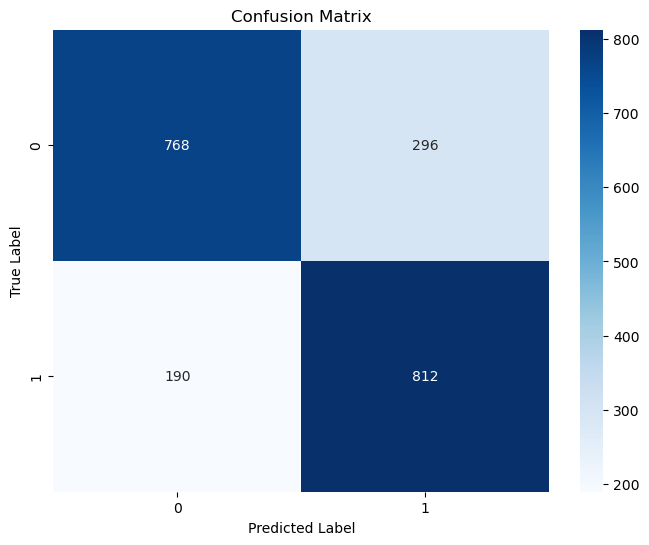

In [19]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Tracé de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

De cette matrice de confusion nous déduisons que le  model a prédit que 768 clients n'allaient pas se désabonner
et c'était le cas,812 allaient se désabonner et c'était également le cas.Par contre il a prédit quee 190 clients n'allaient pas se désabonner 
ce qui était faux ;de même qu'il avait prédit que 296 allaient quitter et c'était également pas le cas. 

# 5-Choix d'un autre algorithme de classification: Random Forest

L'algorithme Random Forest est une technique d'apprentissage automatique utilisée à la fois pour la classification et la régression. Il fonctionne en combinant plusieurs arbres de décision, chacun entraîné sur un sous-ensemble aléatoire des données d'entraînement et des caractéristiques. Lors de la prédiction, chaque arbre "vote" pour la classe majoritaire (dans le cas de la classification) ou fournit une prédiction (dans le cas de la régression), puis la prédiction finale est déterminée par le consensus des arbres. Cette approche lui confère plus de robustesse et de précision;ce qui permet de réduire le surajustement et améliore la généralisation par rapport à un simple arbre de décision.

# Entrainement ,Test, Prédiction

In [20]:
 #Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entraîner le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Prédire sur l'ensemble de test
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Calculer l'erreur moyenne (mean error)
mean_error = mean_absolute_error(y_test, y_pred)
print(f'Mean Error: {mean_error:.2f}')


Accuracy: 0.91
Mean Error: 0.09


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculer la précision, le rappel et le score F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Afficher les résultats
print(f'Précision: {precision:.4f}')
print(f'Rappel: {recall:.4f}')
print(f'Score F1: {f1:.4f}')



Précision: 0.8637
Rappel: 0.9551
Score F1: 0.9071


# Interprétation des métriques de performance du modèle :

Précision (Precision) : La précision indique la proportion d'observations positives correctement prédites parmi toutes les observations prédites comme positives. Une précision de 0.8637 signifie que sur toutes les prédictions positives faites par le modèle, environ 86.37% sont réellement positives.

Rappel (Recall) : Le rappel, également appelé sensibilité, mesure la proportion d'observations positives réellement prédites correctement parmi toutes les observations réellement positives. Un rappel de 0.9551 signifie que le modèle a correctement identifié environ 95.51% des clients qui ont réellement résilié leur abonnement.

Score F1 (F1-Score) : Le score F1 est la moyenne harmonique de la précision et du rappel. Il donne une mesure de l'équilibre entre la précision et le rappel. Un score F1 de 0.9071 indique un bon équilibre entre la précision et le rappel du modèle.

Accuracy (Précision globale) : L'accuracy est la proportion d'observations correctement prédites parmi toutes les observations. Une accuracy de 0.91 signifie que le modèle a correctement prédit environ 91% de toutes les observations.

Mean Error (Erreur moyenne) : L'erreur moyenne est la moyenne des erreurs absolues entre les prédictions du modèle et les valeurs réelles. Une mean error de 0.09 indique en moyenne une différence de 9% entre les prédictions du modèle et les valeurs réelles.

In [22]:
# Import des outils nécessaires à la visualisation
from sklearn.tree import export_graphviz
import pydot

# Extraire un arbre de la forêt
tree = rf.estimators_[5]

# Exporter l'image vers un fichier dot
export_graphviz(tree, out_file='tree.dot', feature_names=X.columns, rounded=True, precision=1)

# Utiliser le fichier dot pour créer un graphique
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Écrire le graphique dans un fichier png
graph.write_png('tree.png')


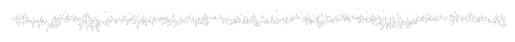

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chemin vers l'image
chemin_image = 'tree.png'

# Charger l'image
image = mpimg.imread(chemin_image)

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Pour masquer les axes
plt.show()

In [23]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 24


Un arbre avec une profondeur de 24 est capable de capturer des relations complexes dans les données d'entraînement, mais il peut être sujet au surapprentissage

In [24]:
# Limiter la profondeur de l'arbre à 2 niveaux
rf_small = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
rf_small.fit(X_train, y_train)

# Extraire le petit arbre
tree_small = rf_small.estimators_[5]

# Sauvegarder l'arbre en tant qu'image png
export_graphviz(tree_small, out_file='small_tree.dot', feature_names=X.columns, rounded=True, precision=1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')


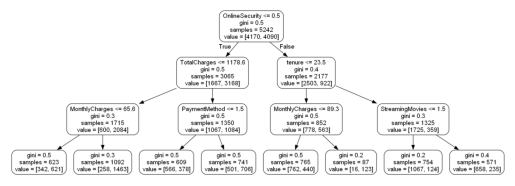

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chemin vers l'image
chemin_image = 'small_tree.png'

# Charger l'image
image = mpimg.imread(chemin_image)

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Pour masquer les axes
plt.show()

Regardons les features les plus importants 

In [25]:
# Récupérer l'importance des features
importances = rf.feature_importances_

# Créer une liste de tuples avec la variable et son importance
features = X.columns
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Trier les feature importances par ordre décroissant d'importance
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Afficher les feature importances
for feature, importance in feature_importances:
    print(f'Variable: {feature.ljust(25)} Importance: {importance}')


Variable: TotalCharges              Importance: 0.17
Variable: tenure                    Importance: 0.16
Variable: MonthlyCharges            Importance: 0.16
Variable: Contract                  Importance: 0.11
Variable: TechSupport               Importance: 0.06
Variable: OnlineSecurity            Importance: 0.05
Variable: PaymentMethod             Importance: 0.05
Variable: gender                    Importance: 0.03
Variable: InternetService           Importance: 0.03
Variable: OnlineBackup              Importance: 0.03
Variable: SeniorCitizen             Importance: 0.02
Variable: Partner                   Importance: 0.02
Variable: Dependents                Importance: 0.02
Variable: MultipleLines             Importance: 0.02
Variable: DeviceProtection          Importance: 0.02
Variable: StreamingTV               Importance: 0.02
Variable: StreamingMovies           Importance: 0.02
Variable: PaperlessBilling          Importance: 0.02
Variable: PhoneService              Importance

Nous essayons d'augmenter la performance de notre modèle  en supprimant dans notre data frame les colonnes les moins importantes 

In [26]:
# Suppression des colonnes les moins importantes
least_important_features = ['Dependents', 'MultipleLines', 'InternetService', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PhoneService']
balanced_df.drop(least_important_features, axis=1, inplace=True)

# Préparation des données X et y
X = balanced_df.drop(columns=['Churn'])
y = balanced_df['Churn']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle de forêt aléatoire
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test après suppression des colonnes
y_pred = rf.predict(X_test)

# Calcul de l'accuracy après suppression des colonnes
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after removing least important features: {accuracy:.2f}')


Accuracy after removing least important features: 0.90


ON veut augmenter nos performances mais nous remarquons que l'acurracy diminue .Donc on reste avec notre modèle de base 

# 5-Comparaison des performances
Random Forest (Accuracy = 0.91) :
La précision plus élevée indique que le modèle Random Forest a une meilleure capacité à prédire correctement les classes des données de test.
Régression Logistique (Accuracy = 0.76) :
Une précision de 0,76 indique que le modèle de régression logistique prédit correctement 76 % des instances des données de test.
Cela peut suggérer que le modèle est moins performant par rapport à Random Forest dans ce cas particulier.

# 6-Difficultés rencontrés et solutions

Sélection des caractéristiques pertinentes : Pour améliorer les performances du modèle, il a été crucial  pour nous de sélectionner les caractéristiques les plus pertinentes. Nous avons effectué une analyse exploratoire approfondie et utilisé des techniques telles que la corrélation,le rééquilibrage des données et les méthodes de sélection de caractéristiques pour choisir les variables les plus informatives.

Optimisation des hyperparamètres : Pour les algorithmes tels que Random Forest, le réglage des hyperparamètres a été essentiel pour obtenir les meilleures performances. 

Evaluation et interprétation des résultats: Comprendre et interpréter les résultats des modèles a été crucial pour prendre des décisions éclairées. Nous avons utilisé des métriques d'évaluation telles que l'accuracy, la précision, le rappel et le F1-score pour évaluer les performances des modèles, et nous avons également examiné les caractéristiques importantes identifiées par le modèle pour comprendre les facteurs qui influencent les prédictions.

En relevant ces défis avec rigueur et en appliquant des techniques appropriées, nous avons pu développer des modèles de machine learning robustes et performants pour résoudre notre problème de classification.

# Conclusion
En conclusion,ce projet a mis en  lumière l'importance de choisir judicieusement l'algorithme de machine learning en fonction du problème à résoudre.Bien que la regression logistique soit un choix classique et interprétable,le random Forest s'est avéré plus performant dans notre cas,mettant en évidance l'impact significatif de la selection de l'algorithme sur les résultats finaux.
Par ailleurs cette étude montre que les entreprises  devraient envisager de proposer des promotions pour les contrats d'un an et de deux ans afin que les clients soient plus enclins à s'abonner à ces contrats, ce qui permettrait de réduire le taux de résiliation. En revanche, le genre ne semble pas avoir une différence significative sur la probabilité de résiliation ou non.    
Elles peuvent offrir des promotions, des bonus ou des réductions aux clients ayant une durée d'abonnement courte afin qu'ils restent plus longtemps avec leurs services